<a href="https://colab.research.google.com/github/kilchinskiy/Hw.4.ipynb/blob/main/Hw.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лінійна регресія: перенавчання і регуляризація

У цьому завданні ми на прикладах побачимо, як перенавчаються лінійні моделі, розберемо, чому так відбувається, і з'ясуємо, як діагностувати та контролювати перенавчання.

В усіх комірках, де вказаний коментар з інструкціями, потрібно написати код, який виконує ці інструкції. Решту комірок із кодом (без коментарів) треба просто виконати. Крім того, у завданні необхідно відповідати на запитання; відповіді потрібно вписувати після виділеного слова "__Відповідь:__".

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Ми будемо працювати з датасетом __"bikes_rent.csv"__, у якому по днях записані календарна інформація та погодні умови, що характеризують автоматизовані пункти прокату велосипедів, а також кількість прокатів у цей день. Останнє ми будемо передбачати; таким чином, ми будемо розв'язувати завдання регресії.

### Ознайомлення з даними

## Завдання 1

Завантажте датасет за допомогою функції __pandas.read_csv__ у змінну __df__. Виведіть перші 5 рядків, щоб переконатися в коректному зчитуванні даних:

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/bikes_rent.csv')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


Для кожного дня прокату відомі такі ознаки:
* _season_: 1 — весна, 2 — літо, 3 — осінь, 4 — зима
* _yr_: 0 — 2011, 1 — 2012
* _mnth_: від 1 до 12
* _holiday_: 0 — немає свята, 1 — є свято
* _weekday_: від 0 до 6
* _workingday_: 0 — неробочий день, 1 — робочий день
* _weathersit_: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)
* _temp_: температура в Цельсіях
* _atemp_: температура за відчуттями в Цельсіях
* _hum_: вологість
* _windspeed(mph)_: швидкість вітру в милях за годину
* _windspeed(ms)_: швидкість вітру в метрах за секунду
* _cnt_: кількість орендованих велосипедів (це цільова ознака, її ми будемо передбачати)

Отже, у нас є речові, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як з речовими. З номінальними ознаками теж можна працювати як з речовими, тому що на них заданий порядок. Давайте подивимося на графіках, як цільова ознака залежить від решти.

Побудуйте графіки залежностей атрибутів від кількості поїздок. Іншими словами, вам потрібно побудувати 12 графіків. На кожному має бути зображена залежність чергового атрибута від змінної **cnt**.

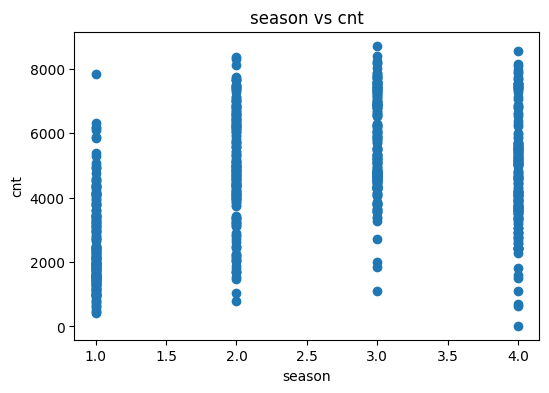

In [52]:
#1.season vs cnt

plt.figure(figsize=(6,4))
plt.scatter(df['season'], df['cnt'])
plt.xlabel('season')
plt.ylabel('cnt')
plt.title('season vs cnt')
plt.show()

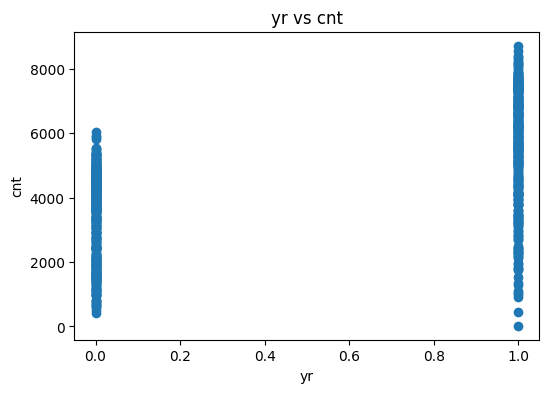

In [6]:
#2.yr vs cnt

plt.figure(figsize=(6,4))
plt.scatter(df['yr'], df['cnt'])
plt.xlabel('yr')
plt.ylabel('cnt')
plt.title('yr vs cnt')
plt.show()

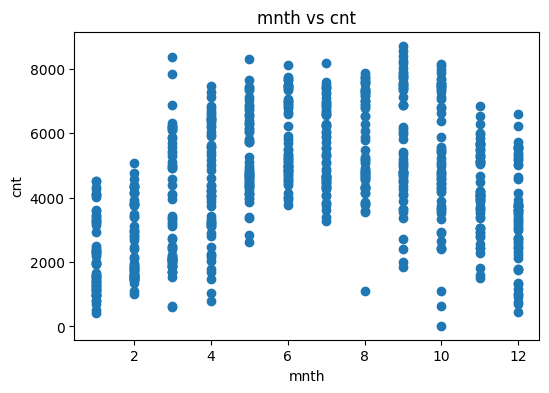

In [7]:
#3.mnth vs cnt

plt.figure(figsize=(6,4))
plt.scatter(df['mnth'], df['cnt'])
plt.xlabel('mnth')
plt.ylabel('cnt')
plt.title('mnth vs cnt')
plt.show()

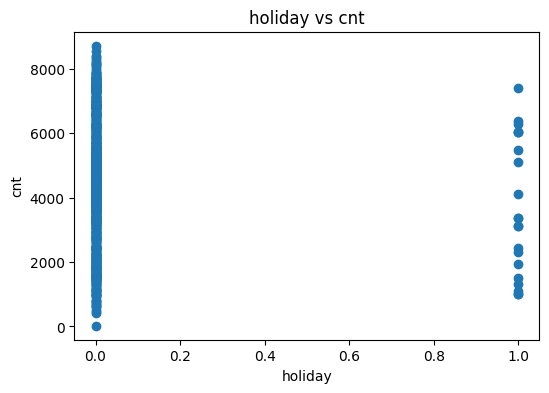

In [8]:
#4.holiday vs cnt

plt.figure(figsize=(6,4))
plt.scatter(df['holiday'], df['cnt'])
plt.xlabel('holiday')
plt.ylabel('cnt')
plt.title('holiday vs cnt')
plt.show()

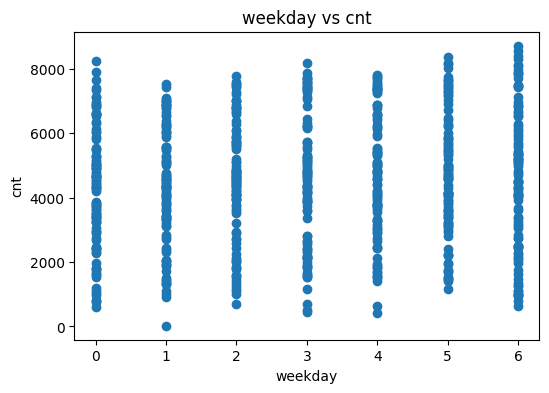

In [9]:
#5.weekday vs cnt

plt.figure(figsize=(6,4))
plt.scatter(df['weekday'], df['cnt'])
plt.xlabel('weekday')
plt.ylabel('cnt')
plt.title('weekday vs cnt')
plt.show()

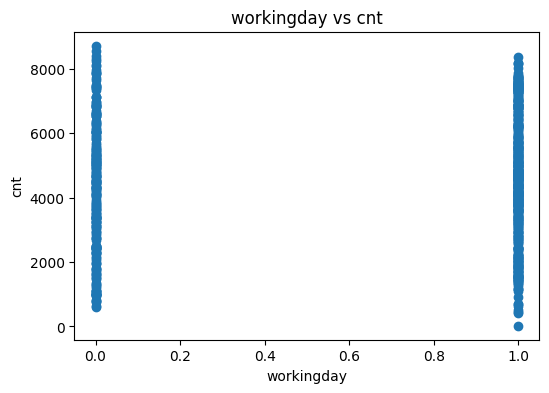

In [10]:
#6.workingday vs cnt

plt.figure(figsize=(6,4))
plt.scatter(df['workingday'], df['cnt'])
plt.xlabel('workingday')
plt.ylabel('cnt')
plt.title('workingday vs cnt')
plt.show()

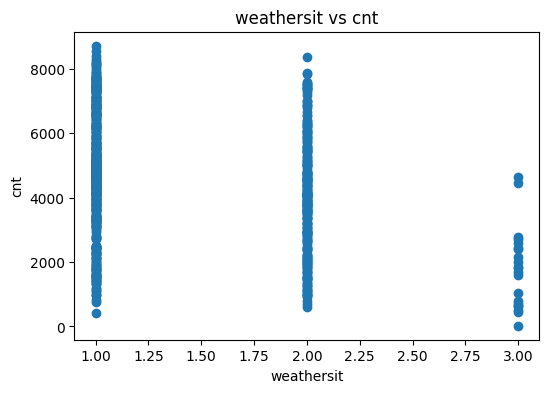

In [11]:
#7.weathersit vs cnt

plt.figure(figsize=(6,4))
plt.scatter(df['weathersit'], df['cnt'])
plt.xlabel('weathersit')
plt.ylabel('cnt')
plt.title('weathersit vs cnt')
plt.show()

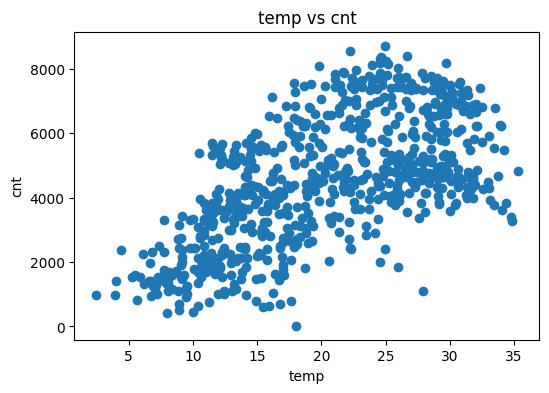

In [12]:
#8.temp vs cnt

plt.figure(figsize=(6,4))
plt.scatter(df['temp'], df['cnt'])
plt.xlabel('temp')
plt.ylabel('cnt')
plt.title('temp vs cnt')
plt.show()

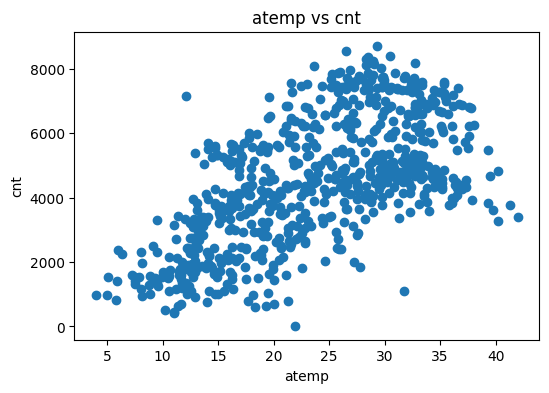

In [13]:
#9.atemp vs cnt

plt.figure(figsize=(6,4))
plt.scatter(df['atemp'], df['cnt'])
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.title('atemp vs cnt')
plt.show()

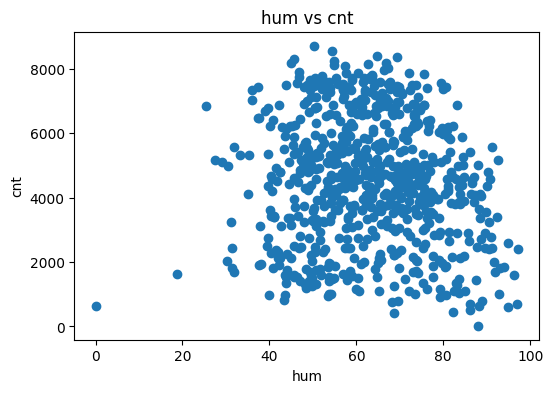

In [14]:
#10.hum vs cnt

plt.figure(figsize=(6,4))
plt.scatter(df['hum'], df['cnt'])
plt.xlabel('hum')
plt.ylabel('cnt')
plt.title('hum vs cnt')
plt.show()

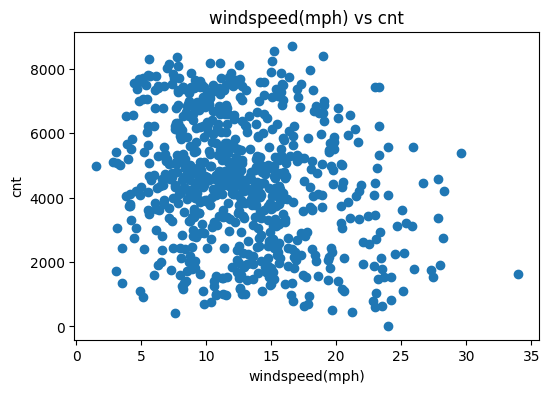

In [15]:
#11.windspeed(mph) vs cnt

plt.figure(figsize=(6,4))
plt.scatter(df['windspeed(mph)'], df['cnt'])
plt.xlabel('windspeed(mph)')
plt.ylabel('cnt')
plt.title('windspeed(mph) vs cnt')
plt.show()

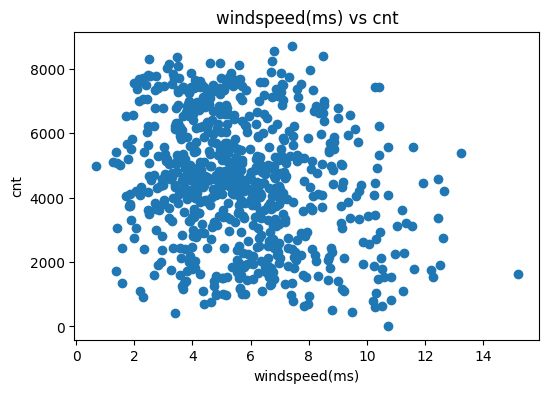

In [16]:
#12.windspeed(ms) vs cnt

plt.figure(figsize=(6,4))
plt.scatter(df['windspeed(ms)'], df['cnt'])
plt.xlabel('windspeed(ms)')
plt.ylabel('cnt')
plt.title('windspeed(ms) vs cnt')
plt.show()

__Запитання:__
1. Яким є характер залежності кількості прокатів від місяця?
1. Вкажіть одну або дві ознаки, від яких кількість прокатів скоріше за все залежить лінійно.

1.Питання:

Залежність кількості прокатів від місяця має сезонний, нелінійний характер.
На графіку видно, що кількість прокатів зростає навесні, досягає максимуму влітку та зменшується восени і взимку. Це пов’язано з погодними умовами та комфортністю їзди на велосипеді в різні пори року.Залежність не є лінійною, а має хвилеподібну форму.

2.Питання:

Найбільш імовірно лінійну залежність можна спостерігати для таких ознак:
temp — температура повітря
atemp — відчутна температура
На графіках видно, що зі збільшенням температури кількість прокатів загалом зростає приблизно по прямій тенденції, без різких стрибків.

## Завдання 2

Давайте більш строго оцінимо рівень лінійної залежності між ознаками та цільовою змінною. Гарною мірою лінійної залежності між двома векторами є кореляція Пірсона. Нам уже доводилося мати з нею справу раніше. Для її обчислення в pandas можна використовувати методи датафрейму: corr і corrwith.

Порахуйте кореляції всіх ознак, окрім останньої, з останньою за допомогою методу `corrwith`.

In [17]:
# 1. Кореляція всіх ознак з цільовою змінною cnt

# Ознаки (всі стовпці крім останнього)
features = df.iloc[:, :-1]

# Цільова змінна (останній стовпець)
target = df.iloc[:, -1]   # або df['cnt']

# Кореляція Пірсона
correlations = features.corrwith(target)

correlations.sort_values(ascending=False)

# У вибірці є ознаки, що мають помітну кореляцію з cnt (наприклад, temp, atemp, season, yr).
# Задачу прогнозування можна розв’язувати лінійними методами.

,0
atemp,0.631066
temp,0.627494
yr,0.566710
season,0.406100
mnth,0.279977
weekday,0.067443
workingday,0.061156
holiday,-0.068348
hum,-0.100659
windspeed(mph),-0.234545


In [18]:
# 2. Кореляція між речовими (числовими) ознаками

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Кореляційна матриця
corr_matrix = numeric_df.corr()

corr_matrix

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659


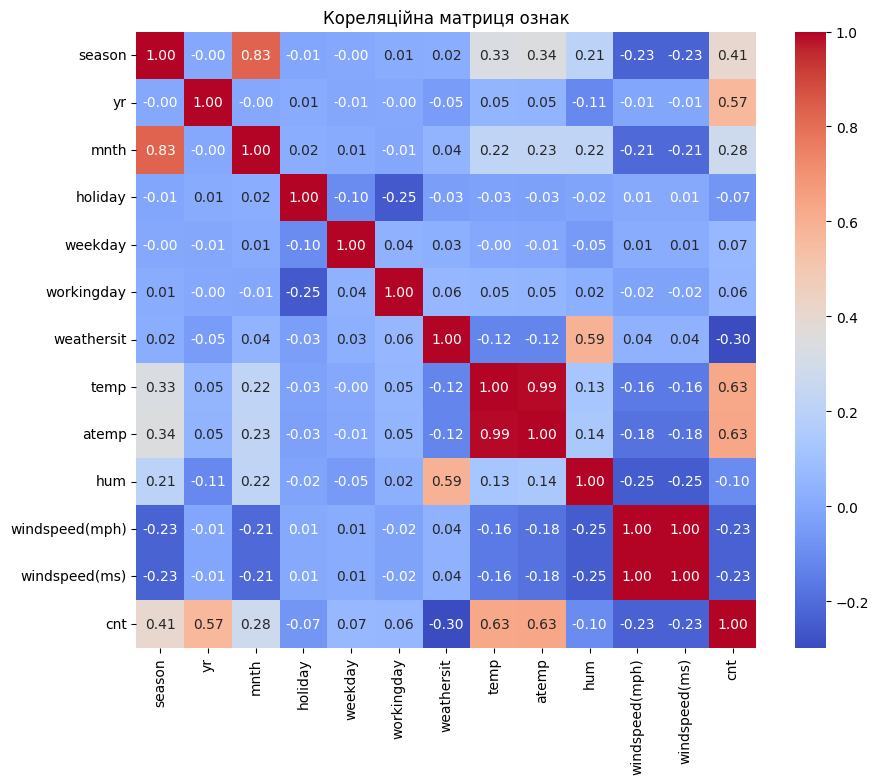

In [19]:
#3. Візуалізуємо

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Кореляційна матриця ознак")
plt.show()

#Деякі ознаки сильно корелюють між собою.
#Наприклад, temp та atemp мають дуже високу кореляцію.
#Це означає, що вони містять схожу інформацію і можуть створювати мультиколінеарність у лінійній моделі.

У вибірці є ознаки, що корелюють із цільовою, а отже, завдання можна розв'язувати лінійними методами.

За графіками видно, що деякі ознаки схожі між собою. Тому давайте також порахуємо кореляції між речовими ознаками.

## Завдання 3

Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt
за допомогою методу corr:

In [20]:
# Обираємо потрібні стовпці
columns = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']

# Обчислюємо кореляційну матрицю
df[columns].corr()

#У кореляційній матриці на головній діагоналі знаходяться одиниці, що є нормальним явищем.
#Tакож спостерігаються дві пари сильно корельованих ознак:
#temp та atemp — логічно пов’язані між собою;
#windspeed(mph) та windspeed(ms) — це одна і та ж швидкість вітру в різних одиницях вимірювання.
#Сильна кореляція між ознаками може викликати проблему мультиколінеарності, що негативно впливає на навчання лінійних моделей.

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


In [21]:
# Середне значення ознак

df[columns].mean()

,0
temp,20.310776
atemp,23.717699
hum,62.789406
windspeed(mph),12.762576
windspeed(ms),5.705220
cnt,4504.348837


На діагоналях, як і належить, стоять одиниці. Однак у матриці є ще дві пари сильно корелюючих стовпців: temp і atemp (корелюють за своєю природою) і два windspeed (тому що це просто переведення одних одиниць в інші). Далі ми побачимо, що цей факт негативно позначається на навчанні лінійної моделі.

Насамкінець подивимося середні ознак (метод mean), щоб оцінити масштаб ознак і частки 1 у бінарних ознак.

## Завдання 4

Виведіть середні ознак.

In [9]:
# Cередні значення всіх числових ознак

df.mean(numeric_only=True)

,0
season,2.496580
yr,0.500684
mnth,6.519836
holiday,0.028728
weekday,2.997264
workingday,0.683995
weathersit,1.395349
temp,20.310776
atemp,23.717699
hum,62.789406


Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки.

### Проблема перша: колінеарні ознаки

Отже, у наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б одразу видалити дублікати, але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.

Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо її середнє і поділимо на стандартне відхилення. Це можна зробити за допомогою методу scale.

Крім того, необхідно перемішати вибірку, це буде потрібно для крос-валідації.

In [36]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle


In [37]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [47]:
X = df.drop(columns=["cnt"])
y = df["cnt"]

# Масштабування (стандартизація)
X_scaled = scale(X)

# Перемішування вибірки
X_scaled, y = shuffle(X_scaled, y, random_state=42)




Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.

In [46]:
from sklearn.linear_model import LinearRegression

# Лінійноа регресії
model = LinearRegression()
model.fit(X_scaled, y)

# Виведемо ваги ознак
feature_weights = pd.Series(model.coef_, index=X.columns)
feature_weights


,0
season,5.708616e+02
yr,1.021969e+03
mnth,-1.412994e+02
holiday,-8.675647e+01
weekday,1.372242e+02
workingday,5.638971e+01
weathersit,-3.302274e+02
temp,3.674509e+02
atemp,5.855810e+02
hum,-1.456117e+02


## Завдання 5

Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі (ваги зберігаються у змінній `coef_` класу регресора). Можна виводити пари (назва ознаки, вага), скориставшись функцією `zip`, вбудованою в мову python. Назви ознак зберігаються у змінній `df.columns`.


In [53]:
# створюємо ознаки і цільову змінну
X = df.drop(columns=["cnt"])
y = df["cnt"]

# стандартизуємо ознаки
from sklearn.preprocessing import scale
X_scaled = scale(X)

# створюємо та навчаємо лінійну регресію
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled, y)

# виводимо ваги моделі
feature_weights = [(f, float(w)) for f, w in zip(df.columns[:-1], model.coef_)]
feature_weights

[('season', 570.8644664328),
 ('yr', 1021.9685526232794),
 ('mnth', -141.30077500162747),
 ('holiday', -86.75556709480772),
 ('weekday', 137.22614502610867),
 ('workingday', 56.395431478805264),
 ('weathersit', -330.23032900741765),
 ('temp', 367.45553382553555),
 ('atemp', 585.5737252242087),
 ('hum', -145.6103755240401),
 ('windspeed(mph)', 12458934173041.951),
 ('windspeed(ms)', -12458934173240.41)]

Ми бачимо, що ваги при лінійно-залежних ознаках за модулем значно більші, ніж при інших ознаках. Щоб зрозуміти, чому так сталося, згадаємо аналітичну формулу, за якою обчислюються ваги лінійної моделі в методі найменших квадратів:

$$w = (X^TX)^{-1} X^T y$$

Якщо в $X$ є колінеарні (лінійно-залежні) стовпці, матриця $X^TX$ стає виродженою, і формула перестає бути коректною. Чим більш залежні ознаки, тим менший визначник цієї матриці й тим гірша апроксимація $Xw \approx y$. Таку ситуацію називають _проблемою мультиколінеарності_.

З парою (temp, atemp) трохи менше корелюючих змінних такого не сталося, однак на практиці завжди варто уважно стежити за коефіцієнтами при схожих ознаках.

Для того щоб розв'язати проблему мультиколінеарності, потрібно скористатися регуляризатором. До оптимізуючого функціоналу додають $L_1$ або $L_2$ норму ваг, помножену на коефіцієнт регуляризації $\alpha$. У першому випадку метод називається Lasso, а у другому — Ridge.

### Завдання 6
Давайте спробуємо навчити лінійні моделі з $L_1$ і $L_2$-регуляризацією, а далі порівняємо їхні ваги. Навчіть регресори Ridge і Lasso з параметрами за замовчуванням і переконайтеся, що проблема з вагами вирішилась.

Навчіть лінійну модель з $L_1$-регуляризацією (клас Lasso) і виведіть ваги.

In [55]:
from sklearn.linear_model import Lasso

# створюємо ознаки та цільову змінну
X = df.drop(columns=['cnt'])
y = df['cnt']

# стандартизація
from sklearn.preprocessing import scale
X_scaled = scale(X)

# навчаємо Lasso
lasso = Lasso()
lasso.fit(X_scaled, y)

# виводимо ваги
for name, coef in zip(X.columns, lasso.coef_):
    print(f"{name}: {coef}")

season: 560.2416160308859
yr: 1019.4634940657198
mnth: -128.73062703678661
holiday: -86.15278133371116
weekday: 137.34789390496312
workingday: 55.212370641356564
weathersit: -332.3698569623486
temp: 376.3632362096936
atemp: 576.5307935045562
hum: -144.12915500348586
windspeed(mph): -197.13968940249555
windspeed(ms): -2.8040009372006552e-08


Навчіть лінійну модель з $L_2$-регуляризацією (клас Ridge) і виведіть ваги.

In [56]:
from sklearn.linear_model import Ridge

# ознаки і мета
X = df.drop(columns=['cnt'])
y = df['cnt']

# стандартизація
from sklearn.preprocessing import scale
X_scaled = scale(X)

# навчаємо Ridge
ridge = Ridge()
ridge.fit(X_scaled, y)

# виведення ваг
for name, coef in zip(X.columns, ridge.coef_):
    print(f"{name}: {coef}")

season: 563.0645722520181
yr: 1018.9483787875286
mnth: -131.87332028247707
holiday: -86.74609799709239
weekday: 138.005111178719
workingday: 55.90311037506476
weathersit: -332.3497884990735
temp: 386.4578891919204
atemp: 566.3470470600548
hum: -145.07132729867234
windspeed(mph): -99.25944108183141
windspeed(ms): -99.25944115430133


### Завдання 7

На відміну від $L_2$-регуляризації, $L_1$ обнуляє ваги при деяких ознаках. Давайте поспостерігаємо, як змінюються ваги зі збільшенням коефіцієнта регуляризації $\alpha$.

Для кожного значення коефіцієнта з `alphas` навчіть регресор `Lasso` і запишіть ваги у список `coefs_lasso`, а потім навчіть `Ridge` і запишіть ваги у список`coefs_ridge`. Конвертуйте отримані списки в `np.array`.

In [58]:


from sklearn.linear_model import Lasso, Ridge
import numpy as np

alphas = np.arange(1, 500, 50)

# списки для ваг
coefs_lasso = []
coefs_ridge = []

# ознаки та мета
X = df.drop(columns=['cnt'])
y = df['cnt']

# стандартизація
from sklearn.preprocessing import scale
X_scaled = scale(X)

# цикл з alphas
for alpha in alphas:

    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_scaled, y)
    coefs_lasso.append(lasso.coef_)

    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y)
    coefs_ridge.append(ridge.coef_)

# перекладаємо у numpy array
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

coefs_lasso, coefs_ridge

(array([[ 5.60241616e+02,  1.01946349e+03, -1.28730627e+02,
         -8.61527813e+01,  1.37347894e+02,  5.52123706e+01,
         -3.32369857e+02,  3.76363236e+02,  5.76530794e+02,
         -1.44129155e+02, -1.97139689e+02, -2.80400094e-08],
        [ 4.10969632e+02,  9.77019409e+02, -0.00000000e+00,
         -5.34489688e+01,  9.19434374e+01,  1.75372118e+01,
         -3.18125568e+02,  3.22829934e+02,  6.10031512e+02,
         -9.10689615e+01, -1.45066095e+02, -2.29785093e-08],
        [ 3.70077089e+02,  9.35945490e+02,  0.00000000e+00,
         -1.21619360e+01,  4.88886342e+01,  0.00000000e+00,
         -3.08805664e+02,  2.69417263e+02,  6.32502623e+02,
         -2.75042876e+01, -9.37749037e+01, -2.41574732e-08],
        [ 3.32835717e+02,  8.91870058e+02,  0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -2.79616688e+02,  2.11052030e+02,  6.62920880e+02,
         -0.00000000e+00, -5.01551472e+01, -2.62733934e-08],
        [ 2.98134448e+02,  8.4565285

Проаналізуйте динаміку ваг при збільшенні параметра регуляризації:

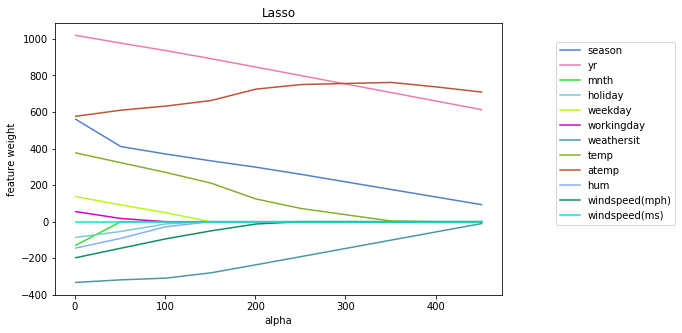

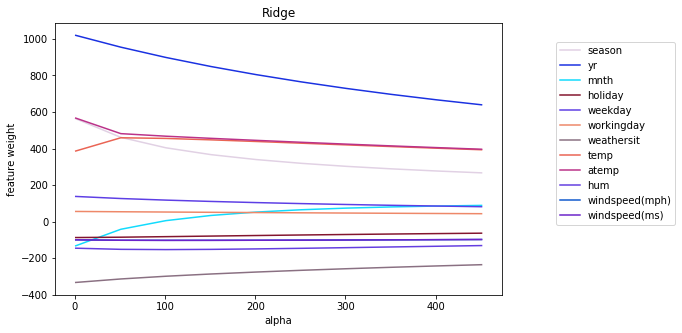

In [ ]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Проаналізуйте графіки та дайте відповіді на такі запитання.

1. Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при одному й тому самому alpha?
1. Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть, чому так відбувається.
1. Чи можна стверджувати, що `Lasso` виключає одну з ознак `windspeed` при будь-якому значенні `alpha > 0`? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт при ньому менший $10^{-3}$.
1. Який із регуляризаторів підійде для відбору неінформативних ознак?

1.Lasso агресивніше зменшує ваги, оскільки L1-регуляризація може занулювати коефіцієнти.

2.При дуже великому alpha всі ваги Lasso прагнуть до нуля, бо штраф за величину ваг стає домінуючим.

3.Lasso може виключати одну з ознак windspeed (|coef| < 1e-3), тоді як Ridge лише зменшує ваги, але не занулює їх.

4.Для відбору неінформативних ознак краще підходить Lasso.

### Завдання 8

Далі будемо працювати з `Lasso`.

Отже, ми бачимо, що при зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.

Для цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику сам оптимізований функціонал методу найменших квадратів, тобто `Mean Square Error`.

По-друге, потрібно зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати `alpha` за значенням MSE на навчальній вибірці, тому що тоді ми не зможемо оцінити, як модель буде робити передбачення на нових для неї даних. Якщо ми виберемо одне розбиття вибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. Тому будемо робити декілька розбиттів вибірки, на кожному пробувати різні значення alpha, а потім усереднювати MSE. Найзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на $K$ частин, і кожного разу брати одну з них як тестову, а з блоків, що залишилися, складати навчальну вибірку.

Робити крос-валідацію для регресії в sklearn зовсім просто: для цього є спеціальний регресор, __LassoCV__, який бере на вхід список із alpha і для кожного з них обчислює MSE на крос-валідації. Після навчання (якщо залишити параметр cv=3 за замовчуванням) регресор буде містити змінну __mse\_path\___, матрицю розміру len(alpha) x k, k = 3 (число блоків у крос-валідації), що містить значення MSE на тесті для відповідних запусків. Крім того, у змінній alpha\_ буде зберігатися вибране значення параметра регуляризації, а в coef\_, традиційно, навчені ваги, що відповідають цьому alpha_.

Зверніть увагу, що регресор може змінювати порядок, у якому він проходить по alphas; для зіставлення з матрицею MSE краще використовувати змінну регресора alphas_.

Навчіть регресор `LassoCV` на всіх параметрах регуляризації з alpha. Побудуйте графік _усередненого_ за рядками `MSE` в залежності від `alpha` (використовуйте для цього функцію `create_plot`).

Виведіть вибране `alpha`, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

In [13]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = [e[0] for e in data]
    y = [e[1] for e in data]

    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

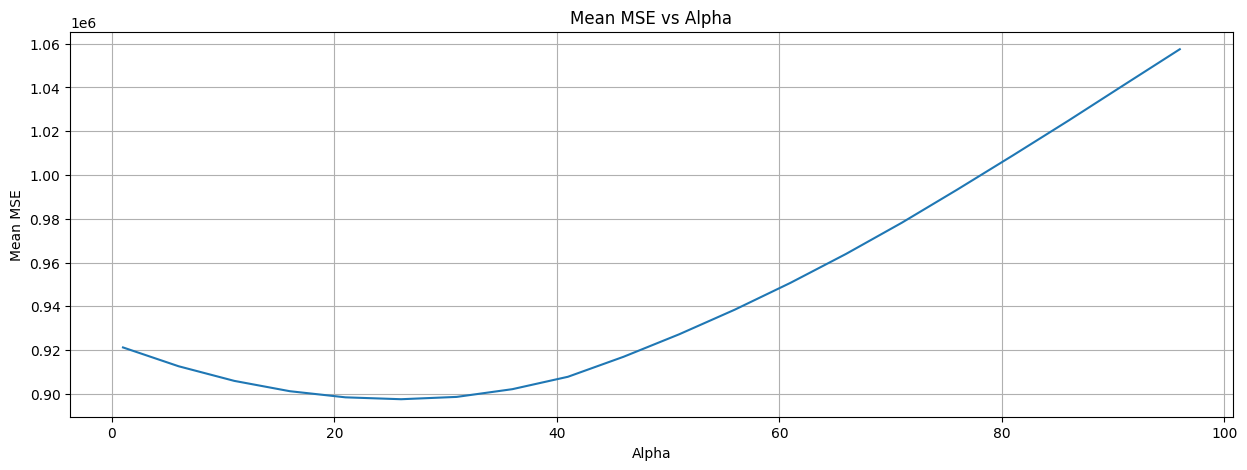

Обране alpha: 26


[('season', np.float64(431.5050146339462)),
 ('yr', np.float64(997.59495798591)),
 ('mnth', np.float64(-0.0)),
 ('holiday', np.float64(-71.47585346746403)),
 ('weekday', np.float64(113.41239026287367)),
 ('workingday', np.float64(36.83135531495438)),
 ('weathersit', np.float64(-323.67910842163855)),
 ('temp', np.float64(348.31239784094066)),
 ('atemp', np.float64(599.3914909821132)),
 ('hum', np.float64(-122.41739716302794)),
 ('windspeed(mph)', np.float64(-170.4494205362287)),
 ('windspeed(ms)', np.float64(-2.2573514173263443e-08))]

In [17]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import scale
import numpy as np

# Формуємо ознаки та цільову змінну
X = df.drop(columns=["cnt"])
y = df["cnt"]

# Стандартизація ознак
X_scaled = scale(X)

# Список alpha
alphas = np.arange(1, 100, 5)

# Навчаємо LassoCV
regressor = LassoCV(alphas=alphas, cv=3, random_state=42)
regressor.fit(X_scaled, y)

# Середній MSE з фолдів
mean_mse = regressor.mse_path_.mean(axis=1)

# Будуємо графік
data_for_plot = list(zip(regressor.alphas_, mean_mse))

create_plot(
    data_for_plot,
    title="Mean MSE vs Alpha",
    xlabel="Alpha",
    ylabel="Mean MSE"
)

# Виводимо найкраще alpha
print("Обране alpha:", regressor.alpha_)

# Виводимо ваги моделі
feature_coef = list(zip(X.columns, regressor.coef_))
feature_coef




Отже, ми вибрали певний параметр регуляризації. Давайте подивимося, які б ми вибирали alpha, якби ділили вибірку лише один раз на навчальну та тестову, тобто розглянемо траєкторії MSE, що відповідають окремим блокам вибірки.

### Завдання 9

Виведіть значення `alpha`, що відповідають мінімумам `MSE` на кожному розбитті (тобто за стовпцями).
На трьох окремих графіках візуалізуйте стовпці `mse_path_`.


Alphas with minimum MSE:
Alpha = 56, MSE = 725129.9885949274


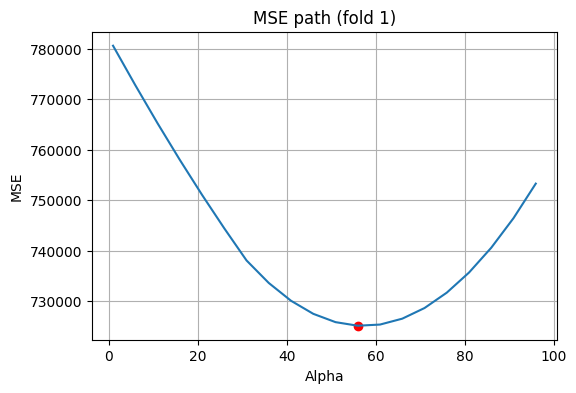

Alpha = 41, MSE = 625492.429599391


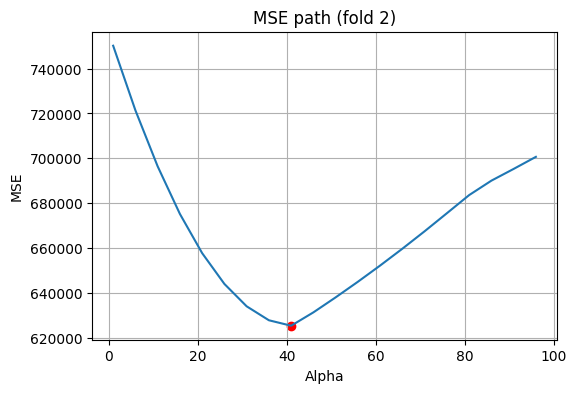

Alpha = 1, MSE = 1232891.043257695


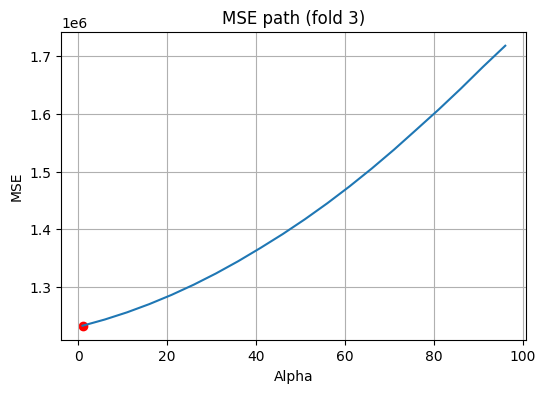

In [18]:
# mse_path_ має форму (n_alphas, n_folds)
mse_path = regressor.mse_path_
alphas = regressor.alphas_

print("Alphas with minimum MSE:")

for i in range(mse_path.shape[1]):  # по кожному фолду
    mse_fold = mse_path[:, i]

    # індекс мінімального значення
    min_index = np.argmin(mse_fold)

    best_alpha = alphas[min_index]
    best_mse = mse_fold[min_index]

    print(f"Alpha = {best_alpha}, MSE = {best_mse}")

    # будуємо окремий графік
    plt.figure(figsize=(6,4))
    plt.plot(alphas, mse_fold)
    plt.scatter(best_alpha, best_mse, color='red')
    plt.xlabel("Alpha")
    plt.ylabel("MSE")
    plt.title(f"MSE path (fold {i+1})")
    plt.grid()
    plt.show()

На кожному розбитті оптимальне значення `alpha` своє, і йому відповідає велике MSE на інших розбиттях. Виходить, що ми налаштовуємося на конкретні навчальні та контрольні вибірки. При виборі `alpha` на крос-валідації ми вибираємо дещо "середнє", що даватиме прийнятне значення метрики на різних розбиттях вибірки.

### Завдання 10

Нарешті, як прийнято в аналізі даних, давайте проінтерпретуємо результат. Дайте відповіді на наступні запитання.

#### Запитання 1

В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей `cnt` від цих ознак, які ми зображали у блоці "Ознайомлення з даними". Чи видно зростаючу лінійну залежність `cnt` від цих ознак за графіками? Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?

__Відповідь:__

In [ ]:
# Найбільші позитивні коефіцієнти мають ознаки: yr, temp, atemp, season.
# Так, на графіках видно зростаючу залежність cnt від temp та atemp — у теплішу погоду люди частіше беруть велосипеди.
# Ознака yr також має позитивний вплив — з кожним роком популярність сервісу зростала.
# season відображає сезонність, і в теплі сезони кількість прокатів більша.
# Можна логічно припустити, що зі збільшенням температури та з розвитком сервісу (з роками) кількість прокатів зростає.

#### Запитання 2

Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. Чи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

__Відповідь:__

In [ ]:
# Найбільші негативні коефіцієнти мають ознаки: weathersit, hum, windspeed.
# На графіках видно, що при погіршенні погодних умов (weathersit), збільшенні вологості (hum) та швидкості вітру (windspeed) кількість прокатів зменшується.
# Це логічно: у погану погоду або при сильному вітрі люди рідше користуються велосипедами.

#### Запитання 3

Випишіть ознаки з коефіцієнтами, близькими до нуля (< 1e-3). Як ви думаєте, чому модель виключила їх із моделі (знову подивіться на графіки)? Чи правда, що вони ніяк не впливають на попит на велосипеди?

__Відповідь:__

In [ ]:
# Коефіцієнти, близькі до нуля, мають ознаки:
# одна з ознак windspeed (через мультиколінеарність), можливо holiday
# Модель виключає їх через:
# сильну кореляцію між windspeed(mph) та windspeed(ms) (це одна й та сама величина в різних одиницях),
# слабкий додатковий внесок у прогноз.
# Це не означає, що ознака взагалі не впливає на попит.
# Просто її інформація вже міститься в інших ознаках, тому модель її "обнуляє".

### Висновок
Отже, ми подивилися, як можна стежити за адекватністю лінійної моделі, як відбирати ознаки і як грамотно, за можливості не налаштовуючись на якусь конкретну порцію даних, підбирати коефіцієнт регуляризації.

Варто зазначити, що за допомогою крос-валідації зручно підбирати лише невелику кількість параметрів. (1, 2, максимум 3), тому що для кожної допустимої їх комбінації нам доводиться декілька разів навчати модель. Такий процес займає багато часу, особливо якщо треба навчатися на великих обсягах даних.